<a href="https://colab.research.google.com/github/ziyafasal/Heart_disease_prediction/blob/main/disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ziyafasal","key":"0a684fc49b5101dd111fe1d25c4887bd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 48.9MB/s]


In [ ]:
import pandas as pd
df=pd.read_csv('/content/heart-disease/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

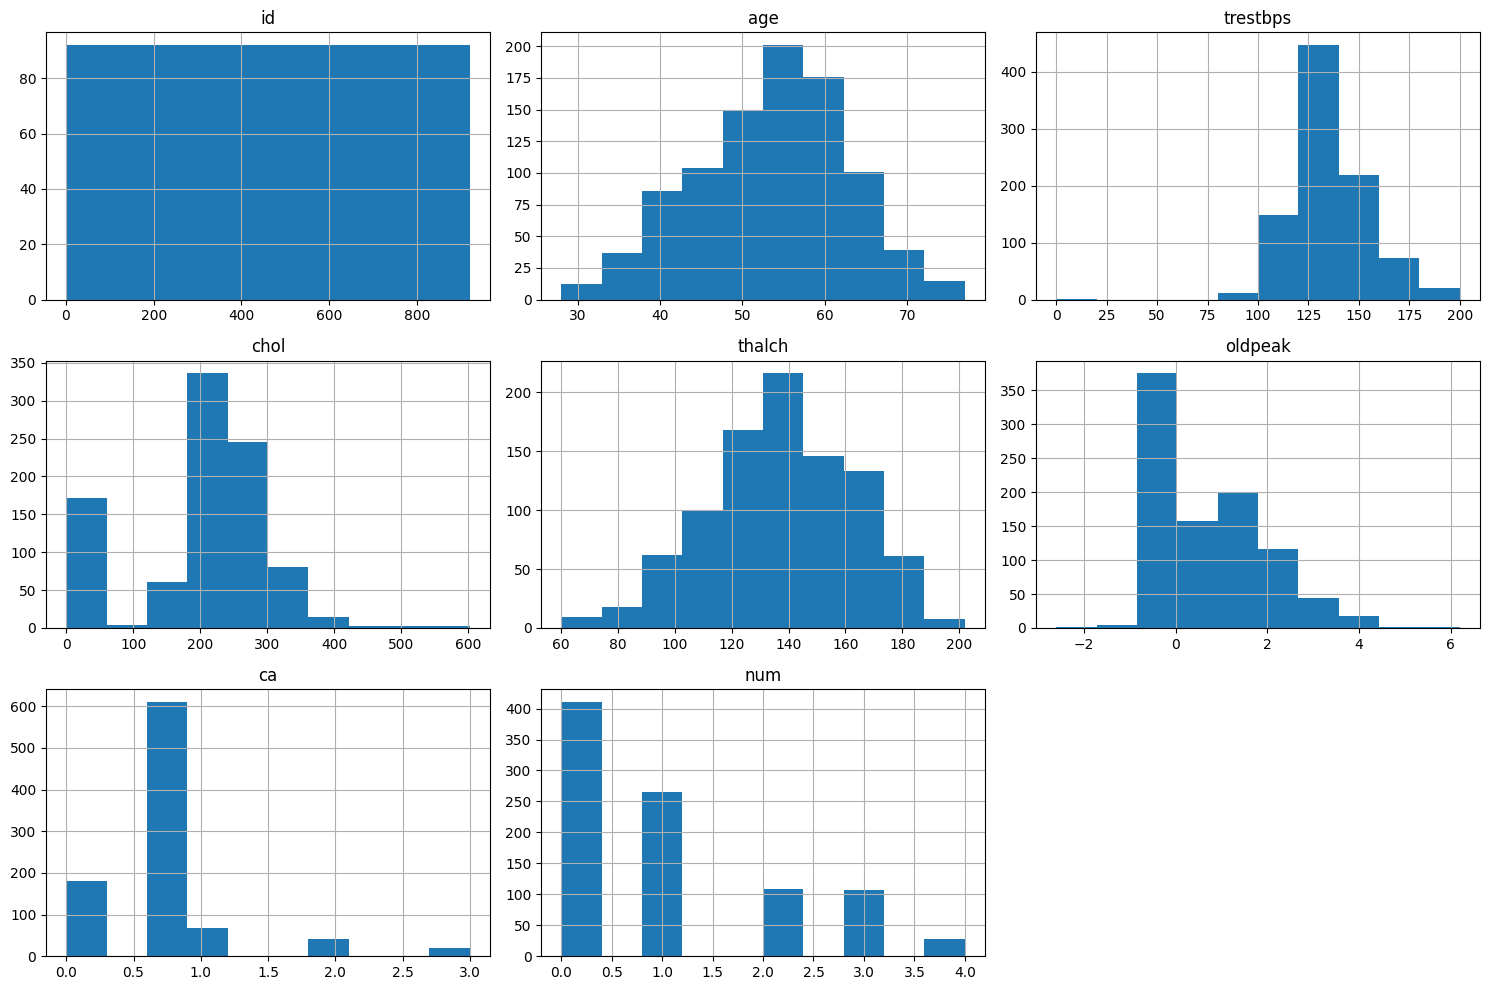

In [ ]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

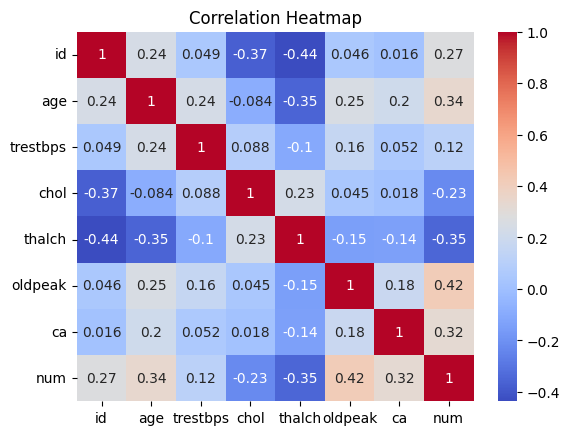

In [ ]:
sns.heatmap(df[numeric_cols].corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [ ]:
X=df.drop('num',axis=1)
y=(df['num']>0).astype(int)
print(X.columns)

X=pd.get_dummies(X,columns=cat_cols)  # non numerical columns are again divided into more columns (eg.: sex--> sex_female and sex_male). So value is either 0 or 1 : ONE-HOT encoding
print("Final feature columns:",X.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
scaler =StandardScaler()   # new_value (x-mean)/std.deviation
X_train_scaled = scaler.fit_transform(X_train) #  fit-learn mean and std.deviation , transform-value to 0 to 100)
X_test_scaled = scaler.transform(X_test) # only transforming

In [ ]:
from sklearn.linear_model import LogisticRegression #classification

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

**Model Evaluation**

Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred_lr=lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred_lr)) #accuracy = 100 means overfitting. 75-98 is better
print(classification_report(y_test,y_pred_lr))


Logistic Regression Accuracy:  0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



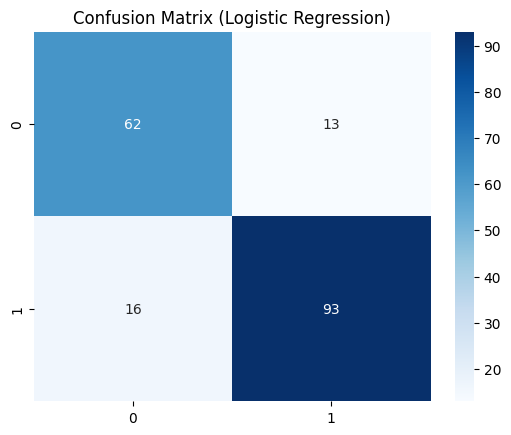

In [ ]:
cm= confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy : ",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy :  0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



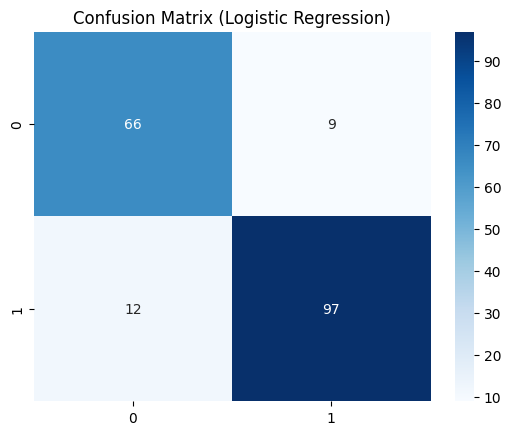

In [ ]:
cm_rf= confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

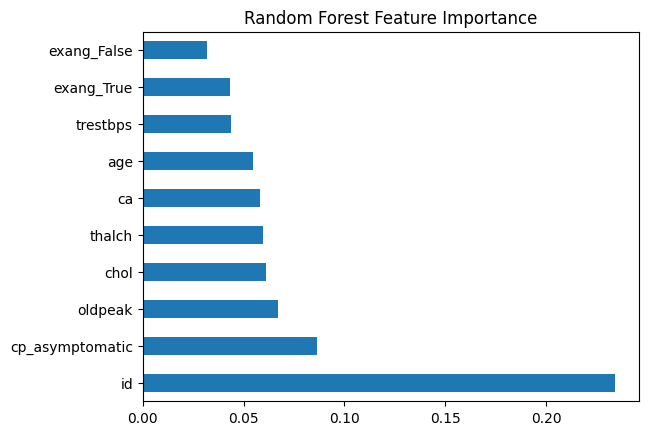

In [ ]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

**Save the Model**


In [ ]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [ ]:
sample = X.head(2)
sample.to_csv('Heart_user_template.csv',index=False)
print("User Template saved as Heart_user_template.csv")

User Template saved as Heart_user_template.csv


**User upload and Prediction**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart_dataset.xlsx to Heart_dataset.xlsx


In [ ]:
import joblib
import pandas as pd

user_df = pd.read_excel('Heart_dataset.xlsx')

#getting columns list from training dataframe
numeric_cols = user_df.select_dtypes(include='number').columns.tolist()
cat_cols= df.select_dtypes(include='object').columns.tolist()
bool_list= df.select_dtypes(include='bool').columns.tolist()

#dropping columns which are extra in user_df than required
numeric_cols=[col for col in numeric_cols if col in user_df.columns]
cat_cols=[col for col in cat_cols if col in user_df.columns]
bool_list=[col for col in bool_list if col in user_df.columns] # Corrected: changed bool_cols to bool_list

#fill missing columns
user_df[numeric_cols]=user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col]= user_df[col].fillna('Unknown')

for col in bool_list: # Corrected: changed bool_cols to bool_list
  user_df[col]= user_df[col].astype(int)

#One-hot encoding
user_df_encoded= pd.get_dummies(user_df,columns=cat_cols) # Corrected: changed cat_cots to cat_cols

#allign columns
user_df_encoded= user_df_encoded.reindex(columns=X.columns, fill_value=0)

#scaling
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

#predict
model=joblib.load('heart_rf_model.pkl')
prediction = model.predict(user_df_scaled)
user_df['heart_disease_prediction']=prediction

print(user_df)
print("Prediction:",prediction)

   Unnamed: 0  id  age     sex    dataset               cp  trestbps  chol  \
0           0   1   63    Male  Cleveland   typical angina       145   233   
1           1   2   23    Male  Cleveland     asymptomatic       125   300   
2           2   3   67    Male  Cleveland     asymptomatic       120   229   
3           3   4   37    Male    Hungary      non-anginal       130   250   
4           4   5   41  Female  Cleveland  atypical angina       130   204   

     fbs         restecg  thalch  exang  oldpeak        slope  ca  \
0   True  lv hypertrophy     150  False      2.3  downsloping   0   
1  False  lv hypertrophy     108   True      1.5         flat   3   
2  False  lv hypertrophy     129   True      2.6         flat   2   
3  False          normal     187  False      3.5  downsloping   0   
4  False          normal     172  False      1.4    upsloping   0   

                thal  heart_disease_prediction  
0       fixed defect                         0  
1             norm